# Seattle Airbnb vs Boston Airbnb

This project aims to analyze the dataset from a tourist point of view.

Questions to be answered:
- What are the types of the avilable rooms?
- Where do they exist on a Map?
- How much does it cost per area?
- What is the seasonal behaviour of the price?
- What are the differences between the two cities regarding the prices and locations
- Are the review ratings between the two cities similary?

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
%matplotlib inline
import calendar


C:\Users\EngMo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\EngMo\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# Reading the listing datasets for Seattle and Boston
df_listing = pd.read_csv('./seattle/listings.csv')
df_listing_boston = pd.read_csv('./boston/listings.csv')
print(df_listing_boston.info())
print(df_listing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

Getting intial information about the dataset

Total number of listings in Seattle is 3818 provided by 2751 hosts
Total number of listings in Boston is 3585 provided by 2181 hosts


Text(0.5, 1.0, 'Boston Dataset Null Percentage')

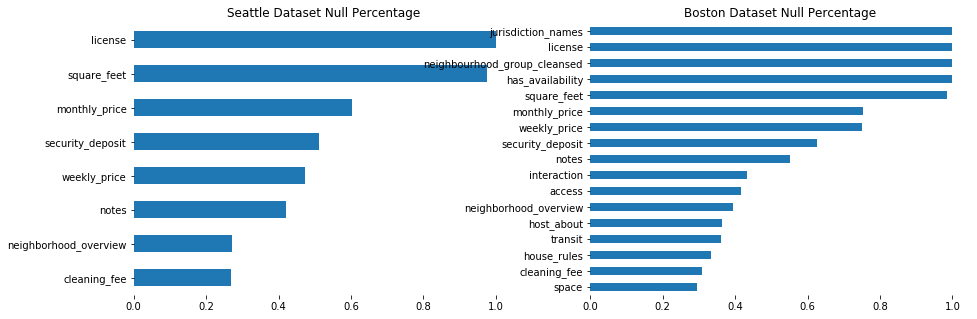

In [3]:
print(f"Total number of listings in Seattle is {len(df_listing)} provided by {len(df_listing.host_id.unique())} hosts")
print(f"Total number of listings in Boston is {len(df_listing_boston)} provided by {len(df_listing_boston.host_id.unique())} hosts")

listings_columns_with_nan = df_listing.isnull().mean()[df_listing.isnull().mean() > 0.25].sort_values()
listings_columns_with_nan_boston = df_listing_boston.isnull().mean()[df_listing_boston.isnull().mean() > 0.25].sort_values()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,15/3))
listings_columns_with_nan.plot.barh(title='NaN Value Percentage', ax=ax1)
listings_columns_with_nan_boston.plot.barh(title='NaN Value Percentage', ax=ax2)
ax1.set_frame_on(False)
ax2.set_frame_on(False)
ax1.set_title('Seattle Dataset Null Percentage')
ax2.set_title('Boston Dataset Null Percentage')

From the above graph, we can see that notes, square_feet, weekly_price, monthly_price, security_deposit and license contain a high percentage of NaN values. For the analysis, these columns not of high relevancy.

Text(0, 0.5, '')

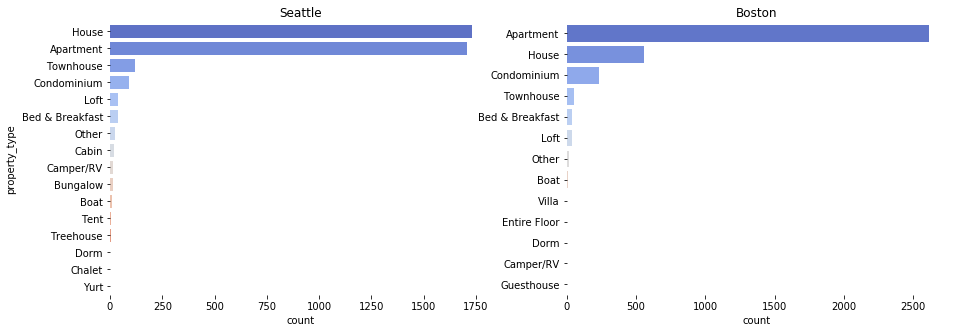

In [4]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,15/3))
sns.countplot(y='property_type', ax=ax1,palette='coolwarm',
             data=df_listing, order=df_listing['property_type'].value_counts().index)
sns.countplot(y='property_type', ax=ax2,palette='coolwarm',
             data=df_listing_boston, order=df_listing_boston['property_type'].value_counts().index)
ax1.set_title('Seattle')
ax2.set_title('Boston')

ax1.set_frame_on(False)
ax2.set_frame_on(False)
ax2.set_ylabel('')

By far, Apartments and houses are the dominant lisitngs in Seattle. In Boston, Apartments is the dominant with more than 2500 offers from 3585. It is worth mentioning here that the population of both cities are almost similar (700k) with an area of 217 km2 for Seattle and 230 km2 for Boston. This was not enough to explain the huge difference between houses offers between Seattle and Boston

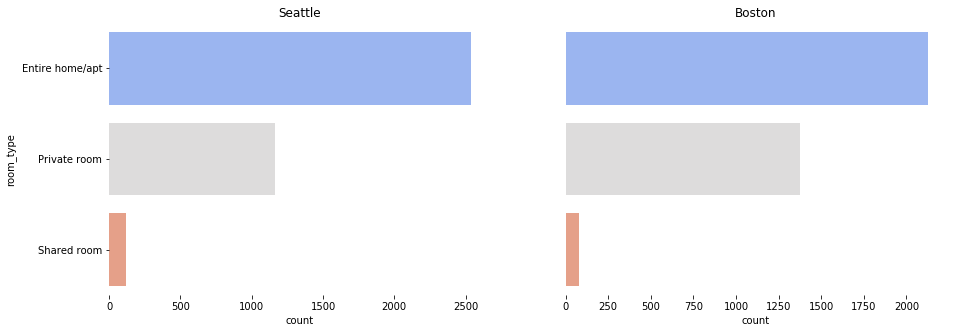

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,15/3))
sns.countplot(y='room_type', data=df_listing, ax=ax1,palette='coolwarm')
sns.countplot(y='room_type', data=df_listing_boston, ax=ax2,palette='coolwarm')
ax2.set_ylabel('')
ax2.set_yticks([])
ax1.set_title('Seattle')
ax2.set_title('Boston')
ax1.set_frame_on(False)
ax2.set_frame_on(False)

From the previous two graphs, we can answer the first question. The type of accomadation is an apartment or a house where in most cases it will be rent fully. The tendancy to find a privte room in Boston is slightly higher than Seatle.

Seatlle consist of many neighbourhoods. But which one has the highest Airbnb listings?

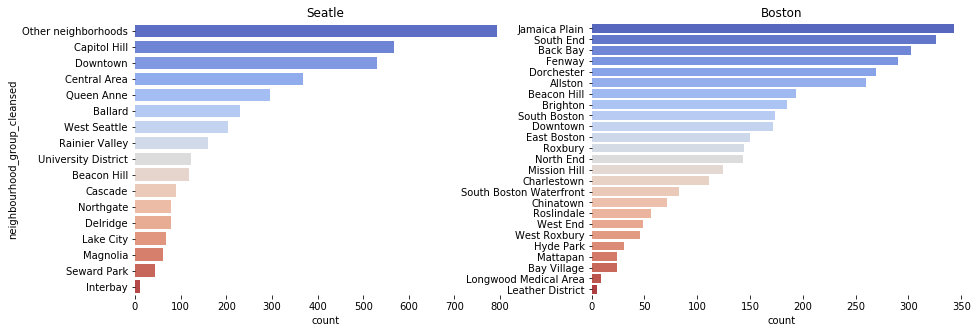

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,15/3))
sns.countplot(y='neighbourhood_group_cleansed', data=df_listing, ax=ax1, palette='coolwarm',
              order=df_listing['neighbourhood_group_cleansed'].value_counts().index)

sns.countplot(y='neighbourhood_cleansed', data=df_listing_boston, ax=ax2, palette='coolwarm',
              order=df_listing_boston['neighbourhood_cleansed'].value_counts().index)

ax2.set_ylabel('')
ax1.set_title('Seatle')
ax2.set_title('Boston')
ax1.set_frame_on(False)
ax2.set_frame_on(False)

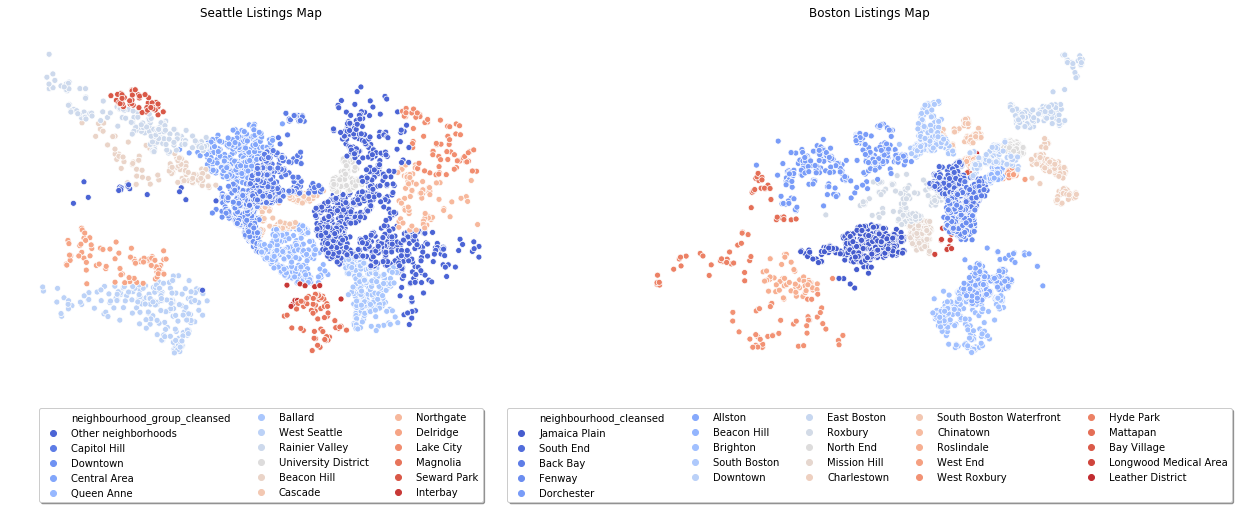

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,20/3))

sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group_cleansed', data=df_listing,ax=ax1,palette='coolwarm',
                hue_order=df_listing['neighbourhood_group_cleansed'].value_counts().index)
sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_cleansed', data=df_listing_boston,ax=ax2,palette='coolwarm',
                hue_order=df_listing_boston['neighbourhood_cleansed'].value_counts().index)

ax1.set_title('Seattle Listings Map')
ax2.set_title('Boston Listings Map')

ax1.set_axis_off()
ax2.set_axis_off()

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

Most of the listings are in unlabeled neighborhoods. Also, note that the top three districts are roughly in the downtown Seattle area, namely Capitol Hill, Downtown, and Central Area. In Boston, Jamaica Plain is the district with the highest listings

In [8]:
df_listing['price'] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)
df_listing_boston['price'] = df_listing_boston['price'].replace('[\$,]', '', regex=True).astype(float)
order_by = df_listing.groupby(['neighbourhood_group_cleansed'])['price'].agg('mean').sort_values(ascending=False).index
order_by_boston = df_listing_boston.groupby(['neighbourhood_cleansed'])['price'].agg('mean').sort_values(ascending=False).index

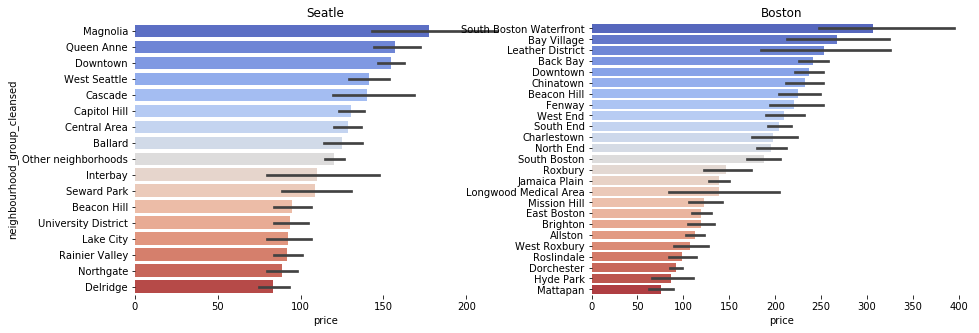

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,15/3))

sns.barplot(x='price',y='neighbourhood_group_cleansed', data=df_listing,
            order=order_by, ax=ax1,palette='coolwarm')
sns.barplot(x='price',y='neighbourhood_cleansed', data=df_listing_boston,
            order=order_by_boston, ax=ax2,palette='coolwarm')

ax2.set_ylabel('')
ax1.set_title('Seatle')
ax2.set_title('Boston')
ax1.set_frame_on(False)
ax2.set_frame_on(False)


Magnolia has few listings approx 90 offerings but it has the highest average price per night with $160 with high std.
The same behaviour can be also seen for Cascade. From the previous graph, It is obvious that no of lisitngs inversly propertional with the price and that results in high std values.

In [10]:
seatle_price_df = pd.read_csv('./seattle/calendar.csv', parse_dates=['date'])
boston_price_df = pd.read_csv('./boston/calendar.csv', parse_dates=['date'])
seatle_price_df['price'] = seatle_price_df['price'].replace('[\$,]', '', regex=True).astype(float)
boston_price_df['price'] = boston_price_df['price'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
seatle_price_df['Year'] = pd.DatetimeIndex(seatle_price_df['date']).year
seatle_price_df['Month'] = pd.DatetimeIndex(seatle_price_df['date']).month
seatle_price_df['Day'] = pd.DatetimeIndex(seatle_price_df['date']).day

boston_price_df['Year'] = pd.DatetimeIndex(boston_price_df['date']).year
boston_price_df['Month'] = pd.DatetimeIndex(boston_price_df['date']).month
boston_price_df['Day'] = pd.DatetimeIndex(boston_price_df['date']).day


temp_seattle = seatle_price_df[['Month','Day', 'price']]
temp_boston = boston_price_df[['Month','Day', 'price']]


In [12]:
heatmap_seattle = temp_seattle.pivot_table(index="Day",columns="Month",values="price").fillna(0)
heatmap_boston = temp_boston.pivot_table(index="Day",columns="Month",values="price").fillna(0)


In [13]:
heatmap_seattle.columns = pd.Series(heatmap_seattle.columns).apply(lambda x: calendar.month_abbr[x])
heatmap_boston.columns = pd.Series(heatmap_boston.columns).apply(lambda x: calendar.month_abbr[x])

[Text(0, 0.5, '1'),
 Text(0, 2.5, '3'),
 Text(0, 4.5, '5'),
 Text(0, 6.5, '7'),
 Text(0, 8.5, '9'),
 Text(0, 10.5, '11'),
 Text(0, 12.5, '13'),
 Text(0, 14.5, '15'),
 Text(0, 16.5, '17'),
 Text(0, 18.5, '19'),
 Text(0, 20.5, '21'),
 Text(0, 22.5, '23'),
 Text(0, 24.5, '25'),
 Text(0, 26.5, '27'),
 Text(0, 28.5, '29'),
 Text(0, 30.5, '31')]

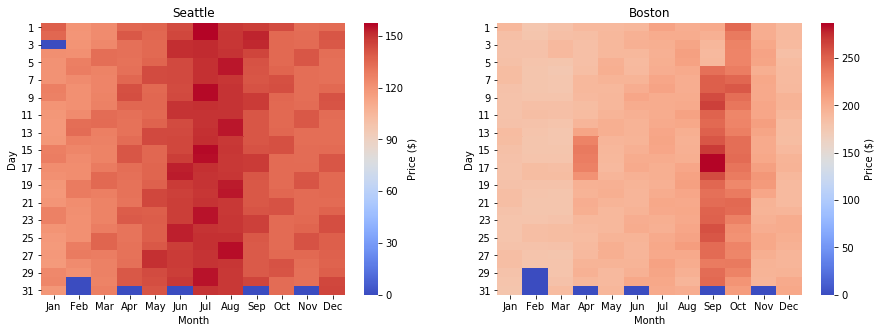

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,15/3))
a = sns.heatmap(heatmap_seattle, cbar_kws={'label': 'Price ($)'},ax=ax1,cmap='coolwarm')
ax1.set_title('Seattle')
b = sns.heatmap(heatmap_boston, cbar_kws={'label': 'Price ($)'}, ax=ax2,cmap='coolwarm')
ax2.set_title('Boston')
a.set_yticklabels(a.get_yticklabels(), rotation = 0)
b.set_yticklabels(b.get_yticklabels(), rotation = 0)


The yearly price trends can be explained from the previous heatmap. In Seatle, prices tend to increase during June, July and Augest, however, in Boston it increases in September and October.

In [15]:
x = df_listing.neighbourhood_group_cleansed.unique()
# x = x[x  != 'Other neighborhoods']

xx = df_listing_boston.neighbourhood_cleansed.unique()

seattle_scatter = df_listing[df_listing['property_type'].isin(['House', 'Apartment'])]
seattle_scatter = seattle_scatter[seattle_scatter['room_type'].isin(['Entire home/apt', 'Private room'])]

boston_scatter = df_listing_boston[df_listing_boston['property_type'].isin(['House', 'Apartment'])]
boston_scatter = boston_scatter[boston_scatter['room_type'].isin(['Entire home/apt', 'Private room'])]


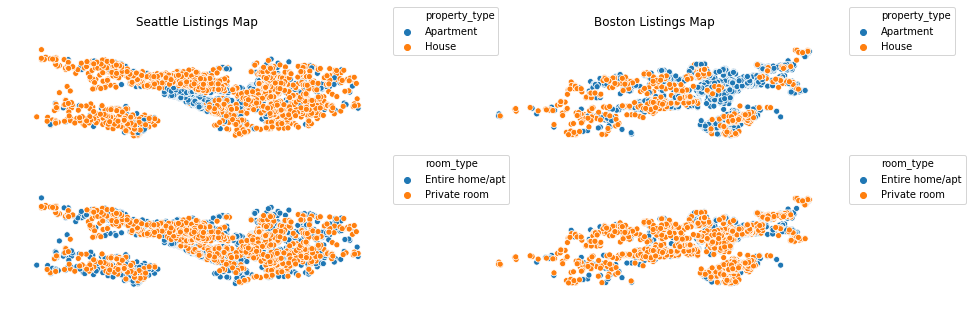

In [16]:
fig, (ax1,ax2) = plt.subplots(2,2, figsize=(15,15/3))

seattle_scatter = seattle_scatter.sort_values(['room_type', 'property_type']).reset_index(drop=True)
boston_scatter = boston_scatter.sort_values(['room_type', 'property_type']).reset_index(drop=True)

sns.scatterplot(x='latitude', y='longitude', hue='property_type',
                data=seattle_scatter,ax=ax1[0])
sns.scatterplot(x='latitude', y='longitude', hue='property_type',
                data=boston_scatter,ax=ax1[1])
ax1[0].set_title('Seattle')
ax1[0].set_xticks([])
ax1[0].set_xlabel('')

sns.scatterplot(x='latitude', y='longitude', hue='room_type',
                data=seattle_scatter,ax=ax2[0])
sns.scatterplot(x='latitude', y='longitude', hue='room_type',
                data=boston_scatter,ax=ax2[1])

ax1[0].set_title('Seattle Listings Map')
ax1[1].set_title('Boston Listings Map')

ax1[0].set_axis_off()
ax1[1].set_axis_off()

ax2[0].set_axis_off()
ax2[1].set_axis_off()

ax1[0].legend(loc='center left', bbox_to_anchor=(1, 1))
ax1[1].legend(loc='center left', bbox_to_anchor=(1, 1))
ax2[0].legend(loc='center left', bbox_to_anchor=(1, 1))
ax2[1].legend(loc='center left', bbox_to_anchor=(1, 1))


Most of listings in both cities are private rooms regardless of the location. However, in Seattle, apartments are by large the most common type offering. Away from the center, when we start to move into the suburbs, we start to see full houses. In Boston, the no of apartments is higher than in Seatle however it exists away from the center.

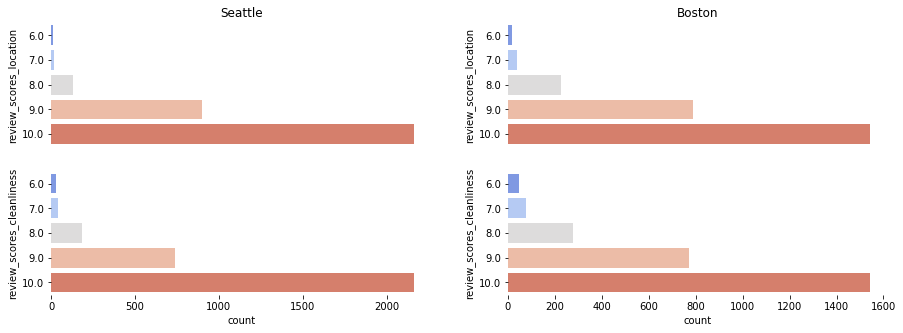

In [17]:
fig, (ax1,ax2) = plt.subplots(2,2, figsize=(15,15/3))
value=6
sns.countplot(y=df_listing[df_listing['review_scores_location'] >= value].review_scores_location,ax=ax1[0],
              palette='coolwarm')
sns.countplot(y=df_listing_boston[df_listing_boston['review_scores_location'] >= value].review_scores_location,ax=ax1[1],
              palette='coolwarm')
ax1[0].set_title('Seattle')
ax1[0].set_xticks([])

sns.countplot(y=df_listing[df_listing['review_scores_cleanliness'] >= value].review_scores_cleanliness,
              ax=ax2[0],palette='coolwarm')
sns.countplot(y=df_listing_boston[df_listing_boston['review_scores_cleanliness'] >= value].review_scores_cleanliness,
              ax=ax2[1],palette='coolwarm')
ax1[1].set_title('Boston')
ax1[1].set_xticks([])
ax1[0].set_xlabel('')
ax1[1].set_xlabel('')

ax1[0].set_frame_on(False)
ax2[0].set_frame_on(False)
ax1[1].set_frame_on(False)
ax2[1].set_frame_on(False)


The count and rating of the reviews has a correlation between cleanliness and location. If the location has a high rating, that mostly will result in a better and cleaner place.

In [18]:
seattle_groupby = df_listing.groupby(['neighbourhood_group_cleansed']).agg('mean').sort_values('review_scores_rating', ascending=False)
boston_groupby = df_listing_boston.groupby(['neighbourhood_cleansed']).agg('mean').sort_values('review_scores_rating', ascending=False)


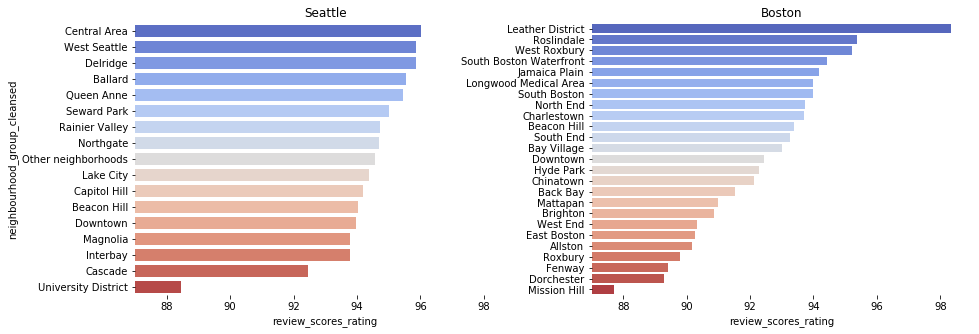

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,15/3))
sns.barplot(y=seattle_groupby.index, x='review_scores_rating', data=seattle_groupby,ax=ax1,
            palette='coolwarm', edgecolor=None)
sns.barplot(y=boston_groupby.index, x='review_scores_rating', data=boston_groupby,ax=ax2,palette='coolwarm')
ax1.set_title('Seattle')
ax2.set_title('Boston')
ax1.set_xlim([87, 99])
ax2.set_xlim([87, 99])
ax2.set_ylabel('')

ax1.set_frame_on(False)
ax2.set_frame_on(False)

Finally, The overall rating in Seattle is almost similar between districts except University DIstrict. In contrast, in boston the disparity is high.